# LLM Powered Chatbot

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

# reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model = 'gpt-4o-mini')

In [8]:
def superbot(state: State):
    return {"messages" : [llm.invoke(state['messages'])]}

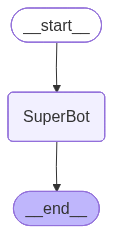

In [10]:
graph = StateGraph(State)

graph.add_node("SuperBot", superbot)

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot", END)

graph_builder = graph.compile()

graph_builder

In [13]:
graph_builder.invoke({"messages":"what was my pervious question ?"})

{'messages': [HumanMessage(content='what was my pervious question ?', additional_kwargs={}, response_metadata={}, id='2f09d375-7edb-4227-8bb5-b835187d6e7f'),
  AIMessage(content="I'm sorry, but I don't have access to previous interactions or any information about you unless it was shared in this conversation. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 14, 'total_tokens': 45, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_c4585b5b9c', 'id': 'chatcmpl-CtrhUeWI6NR0OqgmZhDvmlvN1vM6h', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b8311-2d91-7460-86fc-611fed56326f-0', usage_metadata={'input_tokens': 14, 